In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Collection and Processing

In [3]:
# loading the csv data to a pandas DataFrame   
df = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# number of row and columns
df.shape

(2290, 6)

In [6]:
#  geting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#  checking the number of  missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#  getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_df_without_date = df.drop(['Date'], axis=1)

<Axes: >

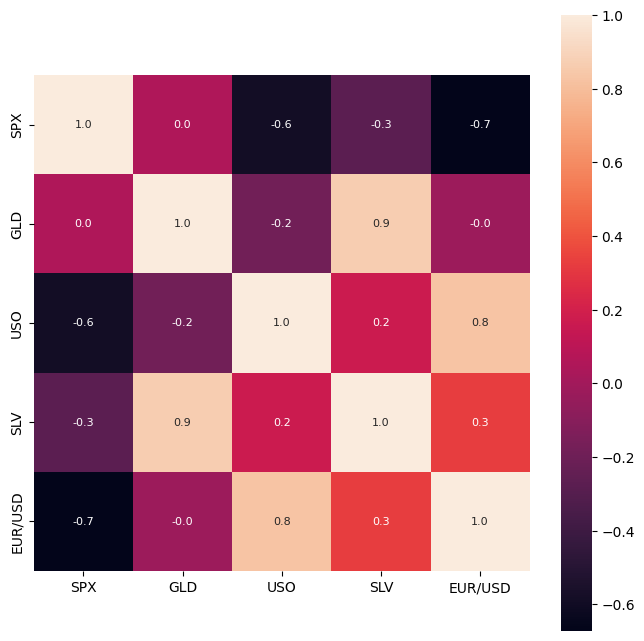

In [10]:
correlation = gold_df_without_date.corr()
 # build a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

In [11]:
# correlation values of GLD
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/tmp/ipykernel_17/2758999319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"],color = 'r')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

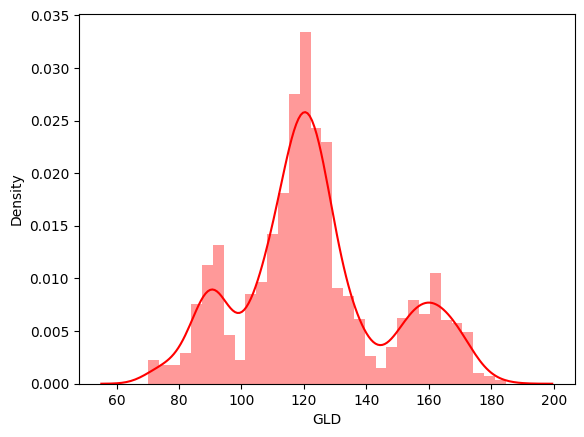

In [12]:
# plot the distribution of the GLD Price
sns.distplot(df["GLD"],color = 'r')

# Splitting  the features and target

In [13]:
x = df.drop(["Date","GLD"],axis = 1)
y = df["GLD"]

# Splitting into training data test data

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model training 

In [15]:
regressor = RandomForestRegressor(n_estimators= 100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
# prediction on  test data
y_pred = regressor.predict(x_test)

In [17]:
y_pred

array([122.41553773, 130.4987032 , 127.68769954,  96.76049765,
       118.84980055, 114.59339958, 124.7937014 , 117.77199935,
       107.9860011 ,  98.31839986,  95.51929961, 167.40759833,
       149.73180054, 116.51380059, 170.63540122,  84.91849997,
       123.35689875, 108.90299744, 113.36280074, 131.69530271,
       124.27409903, 113.65660106, 116.04700005, 108.80129981,
       108.4661017 , 125.88629899, 119.21369952, 112.30799936,
       113.55960141, 125.44569909, 145.98260223,  89.4582    ,
       167.75789934, 113.79659945, 108.46180098, 120.19700105,
       141.93189793, 161.28780097, 173.78799797, 152.9530016 ,
       119.66710125, 113.4429006 , 121.3715996 , 113.91339967,
       122.08160005, 107.82670055,  88.5358989 , 114.44869933,
       129.62320278, 117.74710147, 103.78310095, 129.75290278,
       107.24359848, 160.15650352, 131.64289979, 118.25769952,
       146.52210103, 134.27540243,  95.57700096, 124.54290145,
       115.80459875,  86.40660059, 104.2708992 , 113.69

In [18]:
error_score = metrics.r2_score(y_test,y_pred)
print("R squared error:",error_score)

R squared error: 0.990067475540955


# Compare the actual values and predicted  values in a plot

In [19]:
y_test = list(y_test)

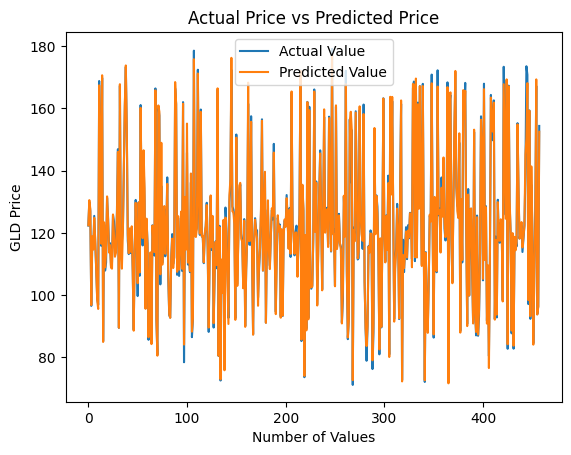

In [20]:
plt.plot(y_test ,label = "Actual Value")
plt.plot(y_pred,label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

# Thank You> 
Please upvote